# Correlation and Dependency

This challenge is about correlations and dependency of variables in data. They are told only to plot with matplotlib and seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Transformation

There are two different datasets, one is for the data(to be loaded header=None) the other is the header.

## 1. Load data with header

In [2]:
### load data which doesnt have a header
df=pd.read_csv('eighthr.data', header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0


In [3]:
### load data of the header
df_name=pd.read_csv('eighthr.names')
df_name.head(2)

,1,0 | two classes 1: ozone day,0: normal day
0,Date: ignore.,NaN,NaN
1,WSR0: continuous.,NaN,NaN


This step is not explicitly told to them so if they dont figure it out, you can tell them

In [4]:
### Removing useless info
df_name['1']=df_name['1'].apply(lambda x: x.split(':')[0])
df.columns=list(df_name['1'])+['ozone day']
df.head(3)

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,ozone day
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0


## 2. Transform data 

They are asked to select ['Date','RH50','RH70','U50','U70','V50','V70','Precp'] from the original data

In [51]:
df_m=df[['Date','RH50','RH70','U50','U70','V50','V70','Precp']]
### They may not notice these two steps are needed so remind them
df_m=df_m.replace('?','0')
df_m[['RH50','RH70','U50','U70','V50','V70','Precp']]=df_m[['RH50','RH70','U50','U70','V50','V70','Precp']].astype(float)
df_m.head(3)

,Date,RH50,RH70,U50,U70,V50,V70,Precp
0,1/1/1998,0.15,0.30,10.67,7.18,-1.56,0.12,0.0
1,1/2/1998,0.48,0.96,8.39,8.24,3.84,7.30,0.0
2,1/3/1998,0.60,0.54,6.94,3.80,9.80,4.42,0.0


# Data Visualization

## 3. Visualize the pairplot for all columns except Date

They need to gain insights on correlation from this plot

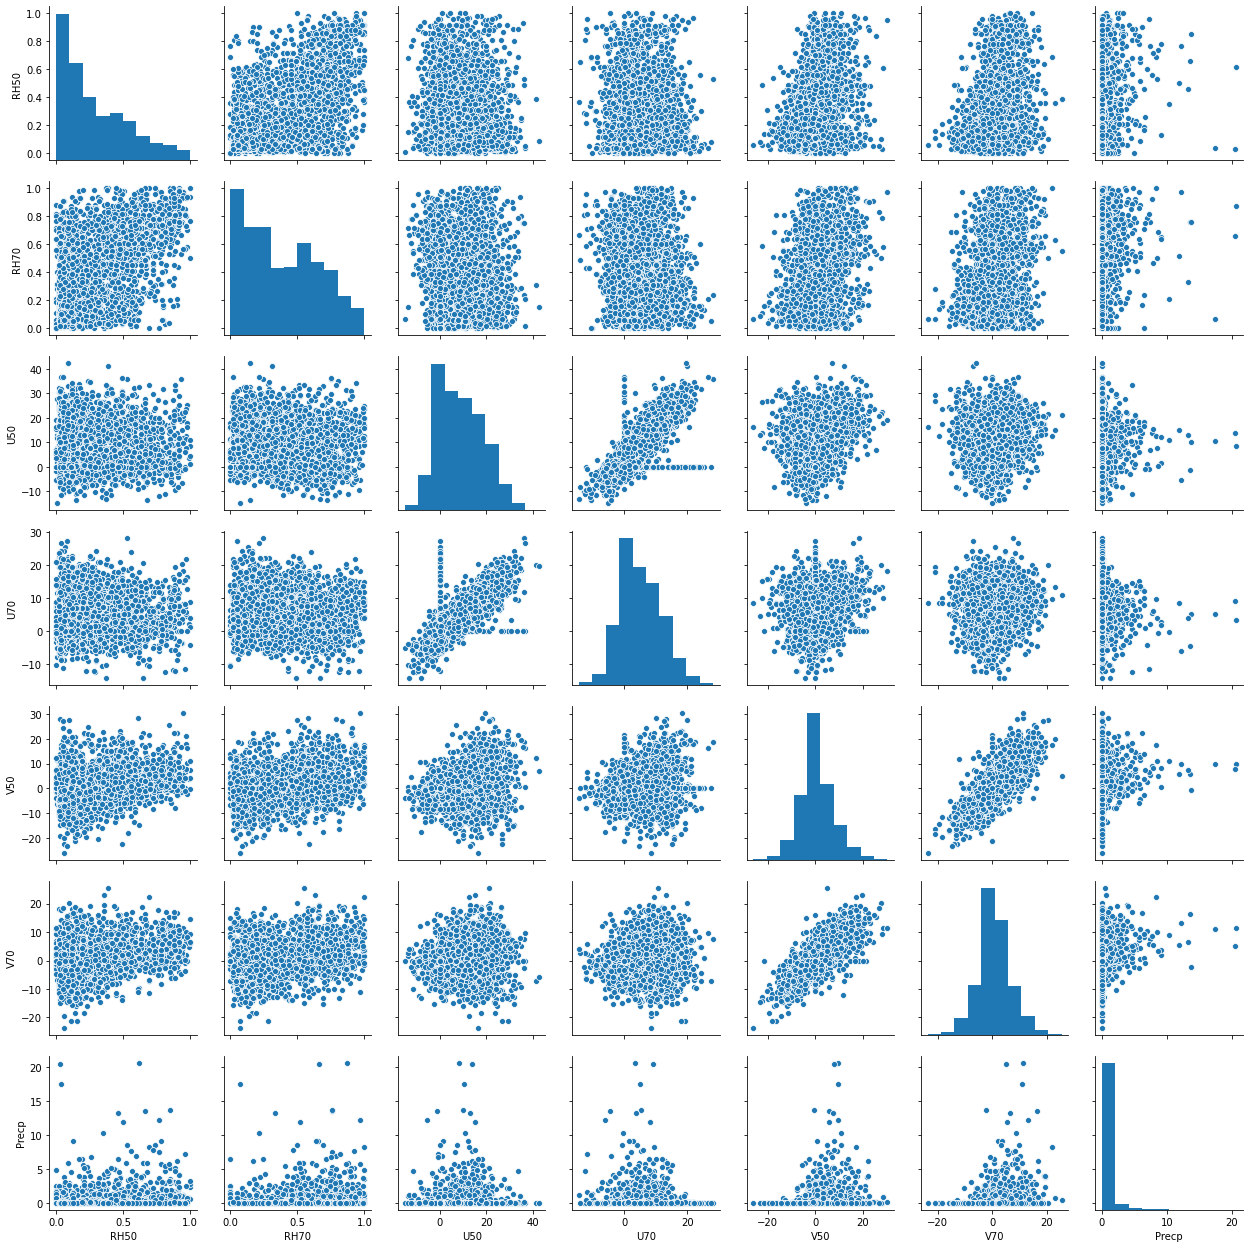

In [52]:
sns.pairplot(df_m.iloc[:,1:].astype(float))
plt.show()

From this plot. we observe that the two winds are correlated to themself. We can also observe that all the variables seem to be correlated to the precipitation

# Statistics

They are to do the Spearman correlation test and determine the 3 highly correlated varibles to Precp

## 4. Spearmanr correlation test on all variables to Precp

In [53]:
import scipy.stats as stats
print('--------------------------------')
for col in df_m.columns[1:-1]:
    result=stats.spearmanr(df_m[col], df_m['Precp'], axis=None)
    print('Variable: %s' % col)
    print('test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('--------------------------------')

--------------------------------
Variable: RH50
test Statistic: 0.288680
p-value: 0.000000
--------------------------------
Variable: RH70
test Statistic: 0.342095
p-value: 0.000000
--------------------------------
Variable: U50
test Statistic: 0.052894
p-value: 0.007741
--------------------------------
Variable: U70
test Statistic: 0.040263
p-value: 0.042703
--------------------------------
Variable: V50
test Statistic: 0.371142
p-value: 0.000000
--------------------------------
Variable: V70
test Statistic: 0.376556
p-value: 0.000000
--------------------------------


This means V50, V70, RH70 are the two variables that correlate most 

# Statistical Modelling

They will model an ols dependence between Precp and the 3 variables which correlate with it.

## 5. Ordinary Least Squares

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Precp ~ V50+ V70+ RH70', data=df_m).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Precp   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     80.96
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.23e-50
Time:                        11:04:12   Log-Likelihood:                -4177.6
No. Observations:                2534   AIC:                             8363.
Df Residuals:                    2530   BIC:                             8387.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.044      0.120      0.904      -0.080       0.091
V50            0.0059      0.006      1.061      0.289      -0.005       0.017
V70            0.0381      0.007      5.846      0.000       0.025       0.051
RH70           0.8413      0.094      8.933      0.000       0.657       1.026
==============================================================================
Omnibus:                     3358.802   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           718264.272
Skew:                           7.358   Prob(JB):                         0.00
Kurtosis:                      84.156   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

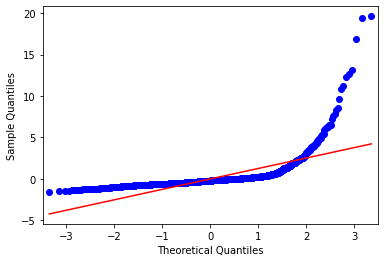

In [55]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

From the error QQplot, we cannot deduce with certainty that the model is a good fit (this is because the error is not linesr). They will have to test futher in the next question.

## 6. Test for Goodness of Fit

In [61]:
########### 1. Independence variables dont correlate with error
print('--------------------------------')
idn=['V50','V70','RH70']
for col in idn:
    result=df_m[col].corr(res)
    print('Variable: %s' % col)
    print('Correlation: %f' % result)
    print('--------------------------------')

--------------------------------
Variable: V50
Correlation: -0.000000
--------------------------------
Variable: V70
Correlation: -0.000000
--------------------------------
Variable: RH70
Correlation: -0.000000
--------------------------------


In [65]:
################ 2. Mean of Error is zero
print('Actual value: ',np.mean(res))
print('Round value: ',round(np.mean(res)))

Actual value:  -2.6024959614338714e-16
Round value:  0


In [67]:
############## 3. Mean Squared Error is small
model.mse_model

128.3642449364955

### Conclusion:
This OLS model is a best estimator for the Precp depedence on these 3 variables because the 3 reasons are verified above.

Their presentation should focus:

- the data they used
- insights from their visualization and spearman's test
- model and goodfit metrics